# Examine and compare losses from an ensemble of models
Do this for the final epoch for an ensemble of models. In both cases, we'll assume you already ran the models and saved the checkpoints. Here we'll load in said checkpoints and examine the MSE and $\beta$-NLL losses.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scripts import train, models, analysis, io

In [22]:
# functions for loading model checkpoints
def get_best_device(fallback="cpu"):
    return torch.device("cuda:0" if torch.cuda.is_available() else fallback)

def load_model_checkpoint(model, model_name, beta, nmodel, epoch, device, path='../models'):
    """
    Load PyTorch model checkpoint from a .pt file.

    :param path: Location to load the model from
    :param DER_type: Type of your model
    :param epoch: Epoch to load
    :param device: Device to load the model onto ('cuda' or 'cpu')
    :param model: PyTorch model to load the checkpoint into
    :return: Loaded model
    """
    file_name = f"{path}/{model_name}_beta_{beta}_nmodel_{nmodel}_epoch_{epoch}.pt"
    
    checkpoint = torch.load(file_name, map_location=device)
    return checkpoint

In [23]:
# in order to load the model you need to tell it what the architecture is
DEVICE = get_best_device()
loss_type = 'bnll_loss'
model, lossFn = models.model_setup_DE(loss_type, DEVICE)

13583.203125 1.835526704788208
24093.7109375 2.619443416595459
14941.1298828125 2.0389392375946045
12201.5126953125 1.6387048959732056
13274.91796875 1.6164402961730957
23056.89453125 2.2806966304779053
12849.078125 1.846254587173462
12545.1845703125 2.5313026905059814
16871.599609375 1.4681320190429688
23119.193359375 4.31790828704834
17445.578125 3.0947790145874023
19599.1640625 2.0742459297180176
17572.15234375 2.9027793407440186
17701.962890625 2.323361396789551
15697.837890625 1.7846583127975464
17294.72265625 1.7470029592514038
45525.1875 3.3419547080993652
9810.1416015625 1.4615453481674194
17074.46484375 2.209374189376831
18493.287109375 3.484530448913574
25003.798828125 2.6211965084075928
12514.2744140625 1.7145894765853882
28640.8984375 8.568196296691895


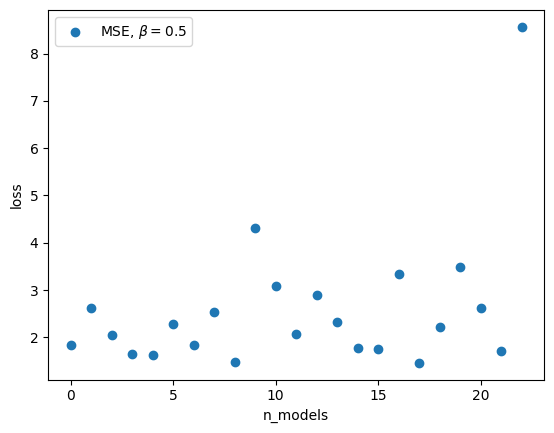

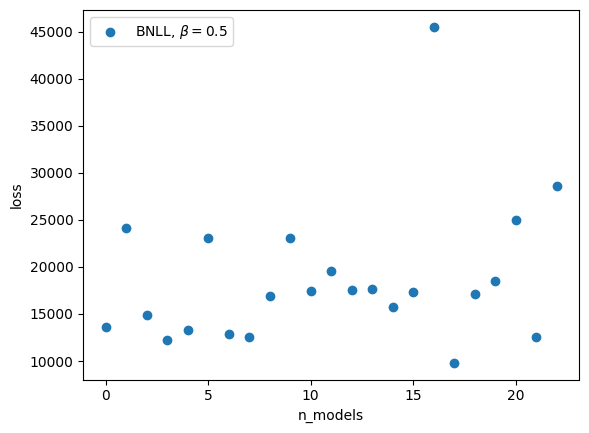

In [33]:
n_models = 100
n_epochs = 100

final_mse = {'0.5': []}
final_bnll = {'0.5': []}
model_n = {'0.5': []}

for n in range(n_models):
    #for e in range(n_epochs):
    # grab just the final checkpoint
    try:
        chk = load_model_checkpoint(model, 'DE_noise_low', 0.5, n, n_epochs-1, DEVICE)
    except FileNotFoundError:
        break
    print(chk['valid_loss'], chk['valid_mse'])
    final_mse['0.5'].append(chk['valid_mse'])
    final_bnll['0.5'].append(chk['valid_loss'])
    model_n['0.5'].append(n)

plt.scatter(model_n['0.5'], final_mse['0.5'], label = r'MSE, $\beta = 0.5$')
plt.legend()
plt.xlabel('n_models')
plt.ylabel('loss')
plt.show()

plt.scatter(model_n['0.5'], final_bnll['0.5'], label = r'BNLL, $\beta = 0.5$')
plt.legend()
plt.xlabel('n_models')
plt.ylabel('loss')
plt.show()
